# T-SNE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tqdm import tqdm
import tensorflow as tf
from matplotlib.colors import ListedColormap
from adjustText import adjust_text
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

2024-06-05 14:40:51.573043: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 14:40:51.573086: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 14:40:51.573123: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-05 14:40:51.580100: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 14:40:52.262073: W tensorflow/compiler/

In [2]:
test_file_path = '../../../../mnt/sda/suhohan/emnist/emnist-byclass-test.csv'
tsne_result_path = 'tsne_results.csv'  # t-SNE 결과 저장 경로

# 데이터 로드
test_data = pd.read_csv(test_file_path)

# 데이터 크기 확인
num_test_samples = test_data.shape[0]

# 데이터 준비
x_test = test_data.iloc[:, 1:].to_numpy().reshape((num_test_samples, 28, 28, 1))
y_test = tf.keras.utils.to_categorical(test_data.iloc[:, 0], 62)
sample_images = x_test.reshape((num_test_samples, -1))
sample_labels = test_data.iloc[:, 0]

In [3]:
def label_transform(label):
    if 0 <= label <= 9:
        return str(label)
    elif 10 <= label <= 35:
        return chr(label + ord('a') - 10)
    elif 36 <= label <= 61:
        return chr(label + ord('A') - 36)
    else:
        return str(label)


# 라벨 변환 적용
transformed_labels = sample_labels.apply(label_transform)

In [ ]:
if os.path.exists(tsne_result_path):
    images_tsne = pd.read_csv(tsne_result_path).to_numpy()
else:
    # t-SNE 적용
    tsne = TSNE(n_components=2, random_state=42)
    images_tsne = tsne.fit_transform(sample_images)
    # t-SNE 결과 저장
    np.savetxt(tsne_result_path, images_tsne, delimiter=',')

In [ ]:
np.random.seed(42)
random_colors = np.random.rand(62, 3)  # RGB 색상
cmap = ListedColormap(random_colors)

In [ ]:
plt.figure(figsize=(12, 10))
scatter = plt.scatter(images_tsne[:, 0], images_tsne[:, 1], c=sample_labels, cmap=cmap, s=3, alpha=0.5)
colorbar = plt.colorbar(scatter)

# Colorbar에 라벨 추가
colorbar.set_ticks(np.arange(62))
colorbar.set_ticklabels([label_transform(i) for i in range(62)])
colorbar.ax.tick_params(labelsize=8)

texts = []
for i in range(62):
    mask = sample_labels == i
    mean_x = np.mean(images_tsne[mask, 0])
    mean_y = np.mean(images_tsne[mask, 1])
    label = label_transform(i)
    color = random_colors[i]
    text_color = 'white' if np.mean(color) < 0.5 else 'black'
    texts.append(plt.text(mean_x, mean_y, label, fontsize=9, ha='center', va='center',
                          bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.3'), color=text_color))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.7))

plt.title('t-SNE visualization of EMNIST ByClass subset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [ ]:
plt.figure(figsize=(12, 10))
scatter = plt.scatter(images_tsne[:, 0], images_tsne[:, 1], c=sample_labels, cmap=cmap, s=3, alpha=0.5)
colorbar = plt.colorbar(scatter)

# Colorbar에 라벨 추가
colorbar.set_ticks(np.arange(62))
colorbar.set_ticklabels([label_transform(i) for i in range(62)])
colorbar.ax.tick_params(labelsize=8)

plt.title('t-SNE visualization of EMNIST ByClass subset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [ ]:
print(len(x_test))

# 시각화

In [4]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

train_file_path = '/mnt/sda/suhohan/emnist/emnist-byclass-train.csv'
chunk_size = 10000
train_data_iter = pd.read_csv(train_file_path, chunksize=chunk_size, header=None)

## 라벨별 이미지 표시 - byclass

In [5]:
samples_per_class = {}

# Iterate over the chunks and extract one sample per class
for chunk in tqdm(train_data_iter, desc='Loading training data'):
    for _, row in chunk.iterrows():
        label = row[0]
        if label not in samples_per_class:
            samples_per_class[label] = row

Loading training data: 70it [00:27,  2.54it/s]


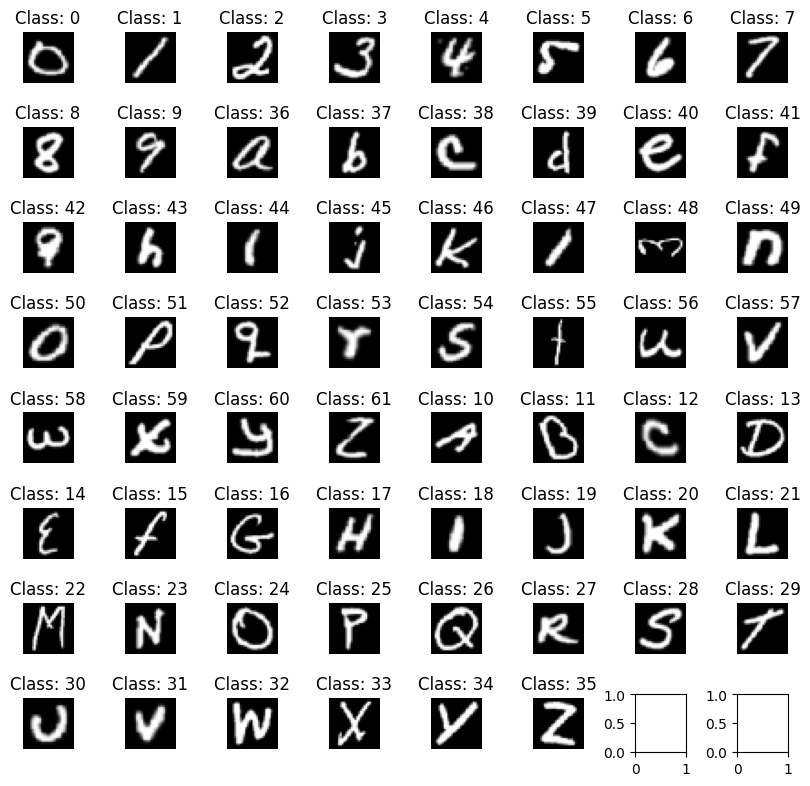

In [6]:
transformed_labels = {label: label_transform(label) for label in samples_per_class.keys()}
sorted_labels = sorted(samples_per_class.keys(), key=lambda x: transformed_labels[x])

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
axes = axes.flatten()
for ax, label in zip(axes, sorted_labels):
    sample = samples_per_class[label]
    image = sample[1:].to_numpy().astype('uint8').reshape(28, 28).T  # Ensure correct reshaping and transpose
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Class: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## 라벨별 이미지 표시 - bymerge

In [7]:
train_file_path = '/mnt/sda/suhohan/emnist/emnist-bymerge-train.csv'
chunk_size = 10000
train_data_iter = pd.read_csv(train_file_path, chunksize=chunk_size, header=None)

In [8]:
samples_per_class = {}

# Iterate over the chunks and extract one sample per class
for chunk in tqdm(train_data_iter, desc='Loading training data'):
    for _, row in chunk.iterrows():
        label = row[0]
        if label not in samples_per_class:
            samples_per_class[label] = row

Loading training data: 70it [00:27,  2.51it/s]


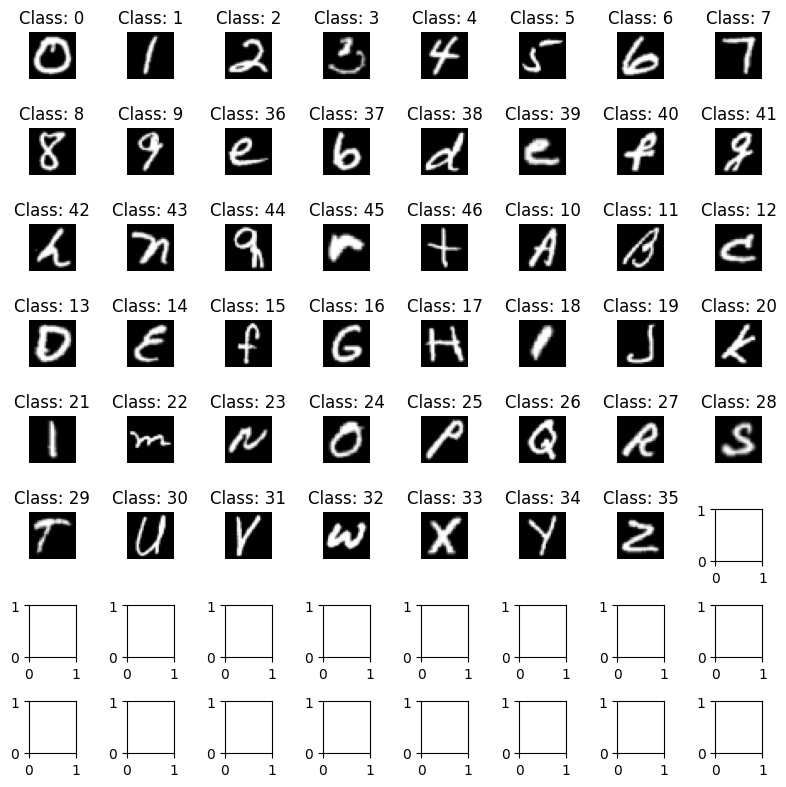

In [9]:
transformed_labels = {label: label_transform(label) for label in samples_per_class.keys()}
sorted_labels = sorted(samples_per_class.keys(), key=lambda x: transformed_labels[x])

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
axes = axes.flatten()
for ax, label in zip(axes, sorted_labels):
    sample = samples_per_class[label]
    image = sample[1:].to_numpy().astype('uint8').reshape(28, 28).T  # Ensure correct reshaping and transpose
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Class: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## 클래스 불균형

In [ ]:
chunk_size = 10000
train_data_iter = pd.read_csv(train_file_path, chunksize=chunk_size)
train_data = pd.concat([chunk for chunk in tqdm(train_data_iter, desc='Loading training data')])

In [ ]:
train_class_counts = train_data.iloc[:, 0].value_counts().sort_index()
transformed_labels = train_class_counts.index.map(label_transform)
train_class_counts.index = transformed_labels

In [ ]:
least_frequent_classes_10 = train_class_counts.nsmallest(10).index
least_frequent_classes_20 = train_class_counts.nsmallest(20).index
least_frequent_classes_30 = train_class_counts.nsmallest(30).index
least_frequent_classes_40 = train_class_counts.nsmallest(40).index
least_frequent_classes_50 = train_class_counts.nsmallest(50).index

# Assign pastel colors
pastel_colors = {
    'red': '#FF9999',
    'orange': '#FFCC99',
    'yellow': '#FFFF99',
    'green': '#99FF99',
    'blue': '#99CCFF',
    'black': '#D3D3D3'  # Light gray
}

# Assign colors based on the frequency group
colors = [pastel_colors['red'] if label in least_frequent_classes_10 else
          pastel_colors['orange'] if label in least_frequent_classes_20 else
          pastel_colors['yellow'] if label in least_frequent_classes_30 else
          pastel_colors['green'] if label in least_frequent_classes_40 else
          pastel_colors['blue'] if label in least_frequent_classes_50 else pastel_colors['black'] for label in train_class_counts.index]

# Plot unsorted class distribution
plt.figure(figsize=(12, 6))
train_class_counts.plot(kind='bar', color=colors)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the class distribution to a CSV file
class_distribution_csv_path = '../results/class_distribution.csv'
train_class_counts.to_csv(class_distribution_csv_path, header=['Count'])

# Sort class counts and realign colors
sorted_train_class_counts = train_class_counts.sort_values()
sorted_colors = [colors[train_class_counts.index.get_loc(idx)] for idx in sorted_train_class_counts.index]

# Plot sorted class distribution
plt.figure(figsize=(12, 6))
sorted_train_class_counts.plot(kind='bar', color=sorted_colors)
plt.title('Sorted Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()